## annoy: Fast Array Retrieval


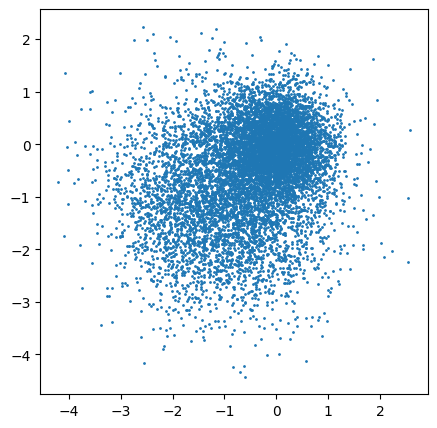

In [4]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

columns = 2

vecs = np.concatenate(
    [
        np.random.normal(-1, 1, (5000, columns)),
        np.random.normal(0, 0.5, (5000, columns)),
    ]
)

annoy = AnnoyIndex(columns, "euclidean")
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
# this is the line that we changed from 1 -> 10
annoy.build(n_trees=10)

plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1)

indices = annoy.get_nns_by_vector(np.array([-1.0, -1.0]), 2000)

## bad labels: And how to find them


## cvxpy: Linear Programming & Quadratic Portfolio


## deon: Sensible Checklists


## embeddings: The intuition behind them


## human learn: Rule Based Systems


## jax: Autodiff


## memo: Collect Stats


## model•mining: From Data to Model


## numba: Fast Numeric Code


## partial_fit: Batches of ML


## ray: Parallel Execution


## scikit dummy: Smart Benchmark


## scikit learn: Overview Starts Here


## scikit meta: Extra Model Behavior


## scikit metrics: Measurement Matters


## scikit prep: Preprocess Data


## scikit save: Re•Use Models Safely


## sympy: Math with Python
